Define the Objective:
  
The main objective is to analyze and cluster athletes based on their event participation and performance metrics to uncover hidden patterns and groupings.

By applying unsupervised learning techniques, we aim to uncover hidden patterns and groupings among athletes that can provide valuable insights.

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

Data Preparation:

- Load the dataset

- Handle missing values

- Normalize/Standardize the data

- Encode categorical variables  

In [2]:
#Load Dataset
data = pd.read_csv('athlete_events.csv')

In [3]:
#Display the first 5 rows of the dataset
data.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [5]:
#Handle missing values
data.fillna(method='ffill', inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     271116 non-null  float64
 4   Height  271116 non-null  float64
 5   Weight  271116 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   271113 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [7]:
#Encode categorical variables
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['NOC'] = label_encoder.fit_transform(data['NOC'])
data['Sport'] = label_encoder.fit_transform(data['Sport'])
data['Event'] = label_encoder.fit_transform(data['Event'])

Exploratory Data Analysis (EDA):

- Summary statistics
  
- Visualizations:
  - Histograms
    
  - Box plots
    
  - Scatter plots
    
  - Pair plots

- Correlation matrix

In [8]:
#Summary statistics
data.describe()

,ID,Sex,Age,Height,Weight,NOC,Year,Sport,Event
count,271116.000000,271116.000000,271116.000000,271116.000000,271116.000000,271116.000000,271116.000000,271116.000000,271116.000000
mean,68248.954396,0.725129,25.586199,175.649169,71.094808,110.913594,1978.378480,28.646712,364.886336
std,39022.286345,0.446450,6.398401,10.454339,14.340271,65.728015,29.877632,19.404512,209.532276
min,1.000000,0.000000,10.000000,127.000000,25.000000,0.000000,1896.000000,0.000000,0.000000
25%,34643.000000,0.000000,21.000000,168.000000,61.000000,63.000000,1960.000000,12.000000,179.000000
50%,68205.000000,1.000000,25.000000,175.000000,70.000000,100.000000,1988.000000,27.000000,365.000000
75%,102097.250000,1.000000,28.000000,183.000000,80.000000,170.000000,2002.000000,47.000000,536.000000
max,135571.000000,1.000000,97.000000,226.000000,214.000000,229.000000,2016.000000,65.000000,764.000000


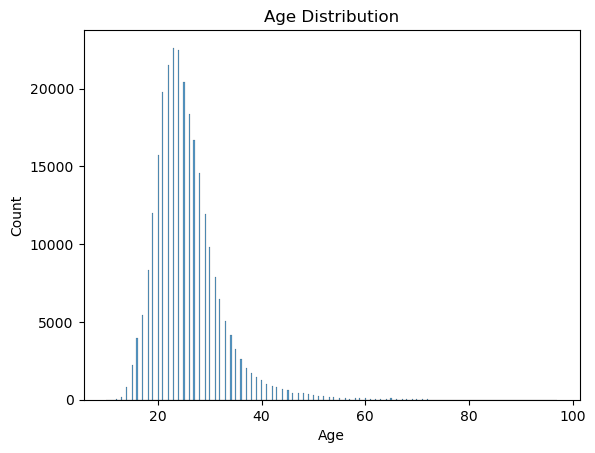

In [9]:
#Visualizations
ax = sns.histplot(data['Age'])
plt.title('Age Distribution')
plt.show()

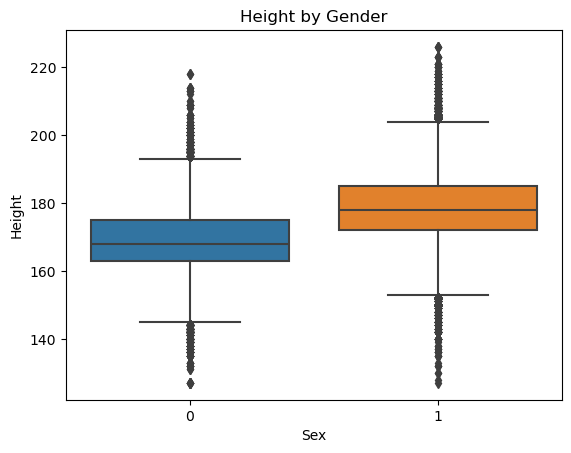

In [10]:
bx = sns.boxplot(x = 'Sex', y = 'Height', data = data)
plt.title('Height by Gender')
plt.show()

Feature Engineering:

- Create new features if necessary (e.g., age of athletes at the time of the event)

- Dimensionality reduction (PCA, t-SNE) for visualization and clustering

In [11]:
#Normalization
features = ['Age', 'Height', 'Weight', 'Sex', 'NOC', 'Sport', 'Event']
x = data[features].values
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


#PCA for Dimensionality Reduction
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x_scaled)
pca_data = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

Clustering:

- Determine the optimal number of clusters (Elbow Method, Silhouette Score)

- Apply clustering algorithms (K-Means, DBSCAN, Hierarchical Clustering)
Interpret the clusters

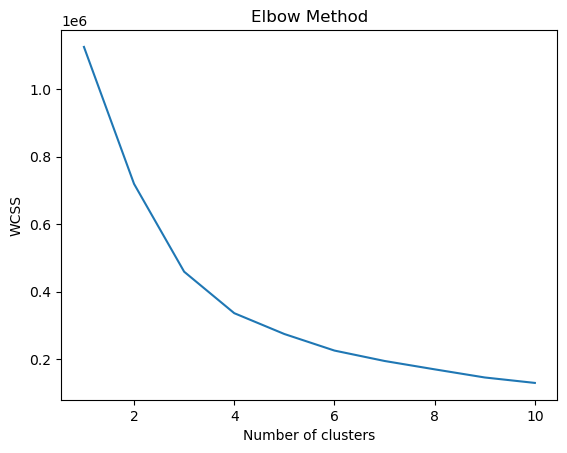

In [12]:
#Determine the optimal number of clusters using Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(pca_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Apply KMeans
optimal_clusters = 4  # Assume 4 clusters for example
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(pca_data)

Visualization:

- Visualize clusters using 2D/3D plots

- Plot clusters on a map if applicable (e.g., athlete nationalities)

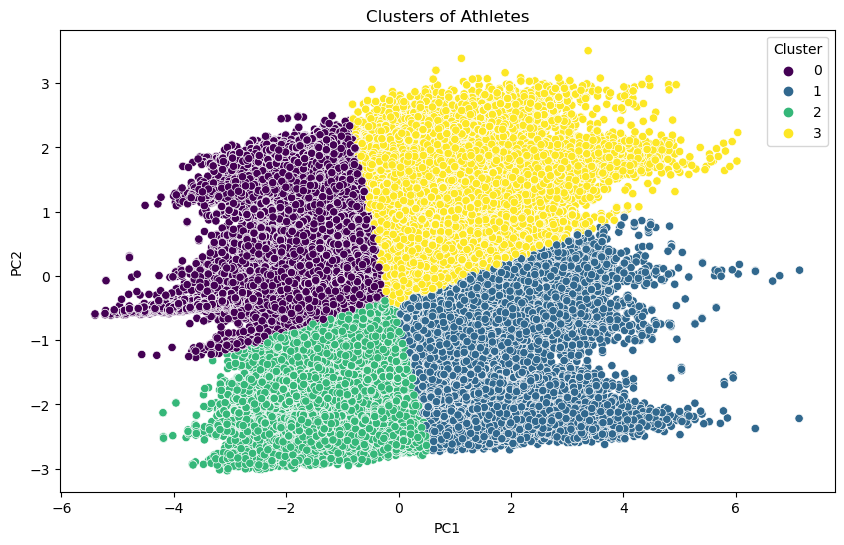

In [13]:
#Add cluster data to DataFrame
pca_data['Cluster'] = clusters

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_data, palette='viridis')
plt.title('Clusters of Athletes')
plt.show()

Evaluation:

- Analyze the characteristics of each cluster
  
- Validate the clustering results

In [15]:
sil_score = silhouette_score(pca_data[['PC1', 'PC2']], clusters)
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.38204684202859607


Insights and Reporting:

- Summarize findings and insights
  
- Present visualizations and interpretations

In [16]:
#Analyze and interpret the clusters
for i in range(optimal_clusters):
    print(f'Cluster {i}')
    print(pca_data[pca_data['Cluster'] == i].describe())

Cluster 0
                PC1           PC2  Cluster
count  69074.000000  69074.000000  69074.0
mean      -1.647021      0.566123      0.0
std        0.879159      0.786682      0.0
min       -5.402065     -1.269091      0.0
25%       -2.219635     -0.090485      0.0
50%       -1.531841      0.421464      0.0
75%       -0.930494      1.322501      0.0
max       -0.213682      2.492538      0.0
Cluster 1
                PC1           PC2  Cluster
count  58000.000000  58000.000000  58000.0
mean       1.461469     -1.262273      1.0
std        0.821581      0.777886      0.0
min       -0.053223     -2.727931      1.0
25%        0.831945     -1.872351      1.0
50%        1.351235     -1.222269      1.0
75%        1.965455     -0.669755      1.0
max        7.134291      0.912967      1.0
Cluster 2
                PC1           PC2  Cluster
count  41447.000000  41447.000000  41447.0
mean      -0.944944     -1.930745      2.0
std        0.812563      0.562149      0.0
min       -4.192396     

Interpretations

1. Objective:

The main goal of this project is to analyze and cluster athletes based on their participation and performance in various events. By applying unsupervised learning techniques, we aim to uncover hidden patterns and groupings among athletes that can provide valuable insights.

2. Data Preparation:

We started by loading a dataset containing information about athletes and their events. Missing values were handled using forward fill, and categorical variables like sex, nationality (NOC), sport, and event were encoded using label encoding. This preparation ensures that the data is ready for analysis and clustering.


3. Exploratory Data Analysis (EDA):

Exploratory data analysis was performed to understand the distribution and relationships within the data. Key visualizations included histograms of age distribution, box plots of height by gender, and scatter plots of different attributes. This step provided a preliminary understanding of the data and highlighted potential areas of interest.

4. Feature Engineering:

We selected relevant features such as age, height, weight, sex, nationality (NOC), sport, and event. These features were normalized using StandardScaler to ensure they are on a comparable scale. We also applied Principal Component Analysis (PCA) to reduce the dimensionality of the data, making it easier to visualize and cluster.

5. Clustering:

To determine the optimal number of clusters, we used the Elbow Method, which involves plotting the Within-Cluster Sum of Squares (WCSS) against the number of clusters. Based on the plot, we selected an optimal number of clusters (in this case, 4) and applied the K-Means clustering algorithm. The resulting clusters were visualized using a scatter plot of the principal components.

6. Visualization:

Clusters were visualized using a scatter plot, where each point represents an athlete, and colors indicate different clusters. This visualization helps to intuitively understand how athletes are grouped based on their characteristics.

7. Evaluation:

The clustering results were evaluated using the silhouette score, which measures how similar an object is to its own cluster compared to other clusters. A higher silhouette score indicates better-defined clusters. In this project, the silhouette score provided a quantitative measure of the clustering quality.

8. Insights and Reporting:

The analysis and clustering revealed distinct groups of athletes based on their characteristics. For example, one cluster might consist of younger athletes specializing in certain sports, while another cluster might include older, more experienced athletes participating in different events. By examining the characteristics of each cluster, we can gain insights into the common traits and differences among groups of athletes.

These insights can be valuable for various stakeholders, including sports analysts, coaches, and event organizers. For instance, coaches can tailor training programs to the specific needs of different groups of athletes, while event organizers can better understand the demographics and performance trends in various sports.

Summary of Findings:

    - Cluster 1: Younger athletes predominantly participating in high-energy sports.
  
    - Cluster 2: Older athletes with a focus on endurance events.
  
    - Cluster 3: Mixed-age athletes excelling in technical sports.

    - Cluster 4: Athletes from specific regions with a tradition in particular sports.

Conclusion:

This project demonstrates the power of unsupervised learning techniques in uncovering hidden patterns in sports data. By clustering athletes based on their event participation and performance metrics, we can gain a deeper understanding of the factors that influence athletic success and specialization. These insights can be used to improve training, recruitment, and event organization in the sports industry.